# Group Beta

# 1. Setup

In [23]:
# imports
# fix tab-completion issues: pip3 install --user jedi==0.17.2 
import corrUtils as corr
import regressionUtils as reg
import databaseUtils as db
import ioFunctions as fnc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import distributionUtils as dist
import time
# Machine learning utils
import machineLearningUtils as mlu
import warnings # Ignore wornings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Set each variable in the dictionary.
connDetails = {
    'host'      : 'localhost',
    'port'      : 5432,
    'dbname'    : 'cohe_6590_armc',
    'user'      : 'cohe_armc',
    'password'  : 'cohe_armc_password'
}

# Schema
schema = 'covid'

In [3]:
# Ensure we set null counts to 0 to avoid issues with NaN down the road
df = db.executeQuery('''
SELECT * FROM {0}.dhhs_nciom_merged;
'''.format(schema), connDetails)
df

,county,cases,cases_per_ten_thousand,cases_per_one_hundred_thousand,deaths,elderly_population,white_population,hispanic_population,african_american_population,college_graduation_rate,adult_obesity_prevalence,adult_smoking_prevalence,diabetes_prevalence,poverty_rate,unemployment_rate,heart_disease_death_rate
0,Alamance,17580,1037,10371,263,0.171,0.629,0.131,0.209,0.229,0.333,0.17,0.092,0.146,0.038,157.7
1,Alexander,4309,1149,11492,83,0.204,0.867,0.048,0.059,0.139,0.232,0.17,0.151,0.117,0.033,145.7
2,Alleghany,995,893,8934,5,0.280,0.867,0.099,0.018,0.187,0.206,0.17,0.097,0.169,0.048,149.1
3,Anson,2501,1023,10231,55,0.193,0.443,0.041,0.485,0.092,0.203,0.20,0.116,0.214,0.042,226.1
4,Ashe,2048,753,7529,41,0.266,0.923,0.051,0.010,0.195,0.190,0.17,0.106,0.146,0.037,161.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wayne,10858,882,8818,238,0.169,0.527,0.124,0.324,0.197,0.364,0.18,0.155,0.186,0.041,183.3
96,Wilkes,6509,951,9514,109,0.222,0.867,0.069,0.047,0.154,0.285,0.18,0.139,0.152,0.041,163.2
97,Wilson,9427,1152,11524,167,0.187,0.468,0.108,0.405,0.188,0.217,0.18,0.093,0.215,0.058,169.0
98,Yadkin,3895,1034,10341,47,0.205,0.838,0.115,0.034,0.120,0.258,0.18,0.096,0.139,0.034,170.8


In [4]:
# Describe (transpose)
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cases,100.0,9569.31000,14947.673177,316.000,2113.25000,5077.0000,10150.75000,108485.000
cases_per_ten_thousand,100.0,922.37000,176.254961,540.000,816.75000,922.5000,1048.00000,1343.000
cases_per_one_hundred_thousand,100.0,9223.61000,1762.082651,5403.000,8168.00000,9227.0000,10477.50000,13429.000
deaths,100.0,125.23000,146.323349,5.000,36.00000,85.5000,163.25000,934.000
elderly_population,100.0,0.20558,0.049718,0.096,0.17175,0.2030,0.23675,0.326
white_population,100.0,0.72413,0.521586,0.247,0.53750,0.7030,0.83825,5.578
hispanic_population,100.0,0.07722,0.041196,0.024,0.04475,0.0685,0.09950,0.230
african_american_population,100.0,0.20738,0.165026,0.005,0.05750,0.1895,0.32550,0.611
college_graduation_rate,100.0,0.21259,0.095365,0.072,0.14775,0.1930,0.24300,0.576
adult_obesity_prevalence,100.0,0.25980,0.046668,0.171,0.21925,0.2600,0.29550,0.364


# 2. Analyzing the Variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   county                          100 non-null    object 
 1   cases                           100 non-null    int64  
 2   cases_per_ten_thousand          100 non-null    int64  
 3   cases_per_one_hundred_thousand  100 non-null    int64  
 4   deaths                          100 non-null    int64  
 5   elderly_population              100 non-null    float64
 6   white_population                100 non-null    float64
 7   hispanic_population             100 non-null    float64
 8   african_american_population     100 non-null    float64
 9   college_graduation_rate         100 non-null    float64
 10  adult_obesity_prevalence        100 non-null    float64
 11  adult_smoking_prevalence        100 non-null    float64
 12  diabetes_prevalence             100 n

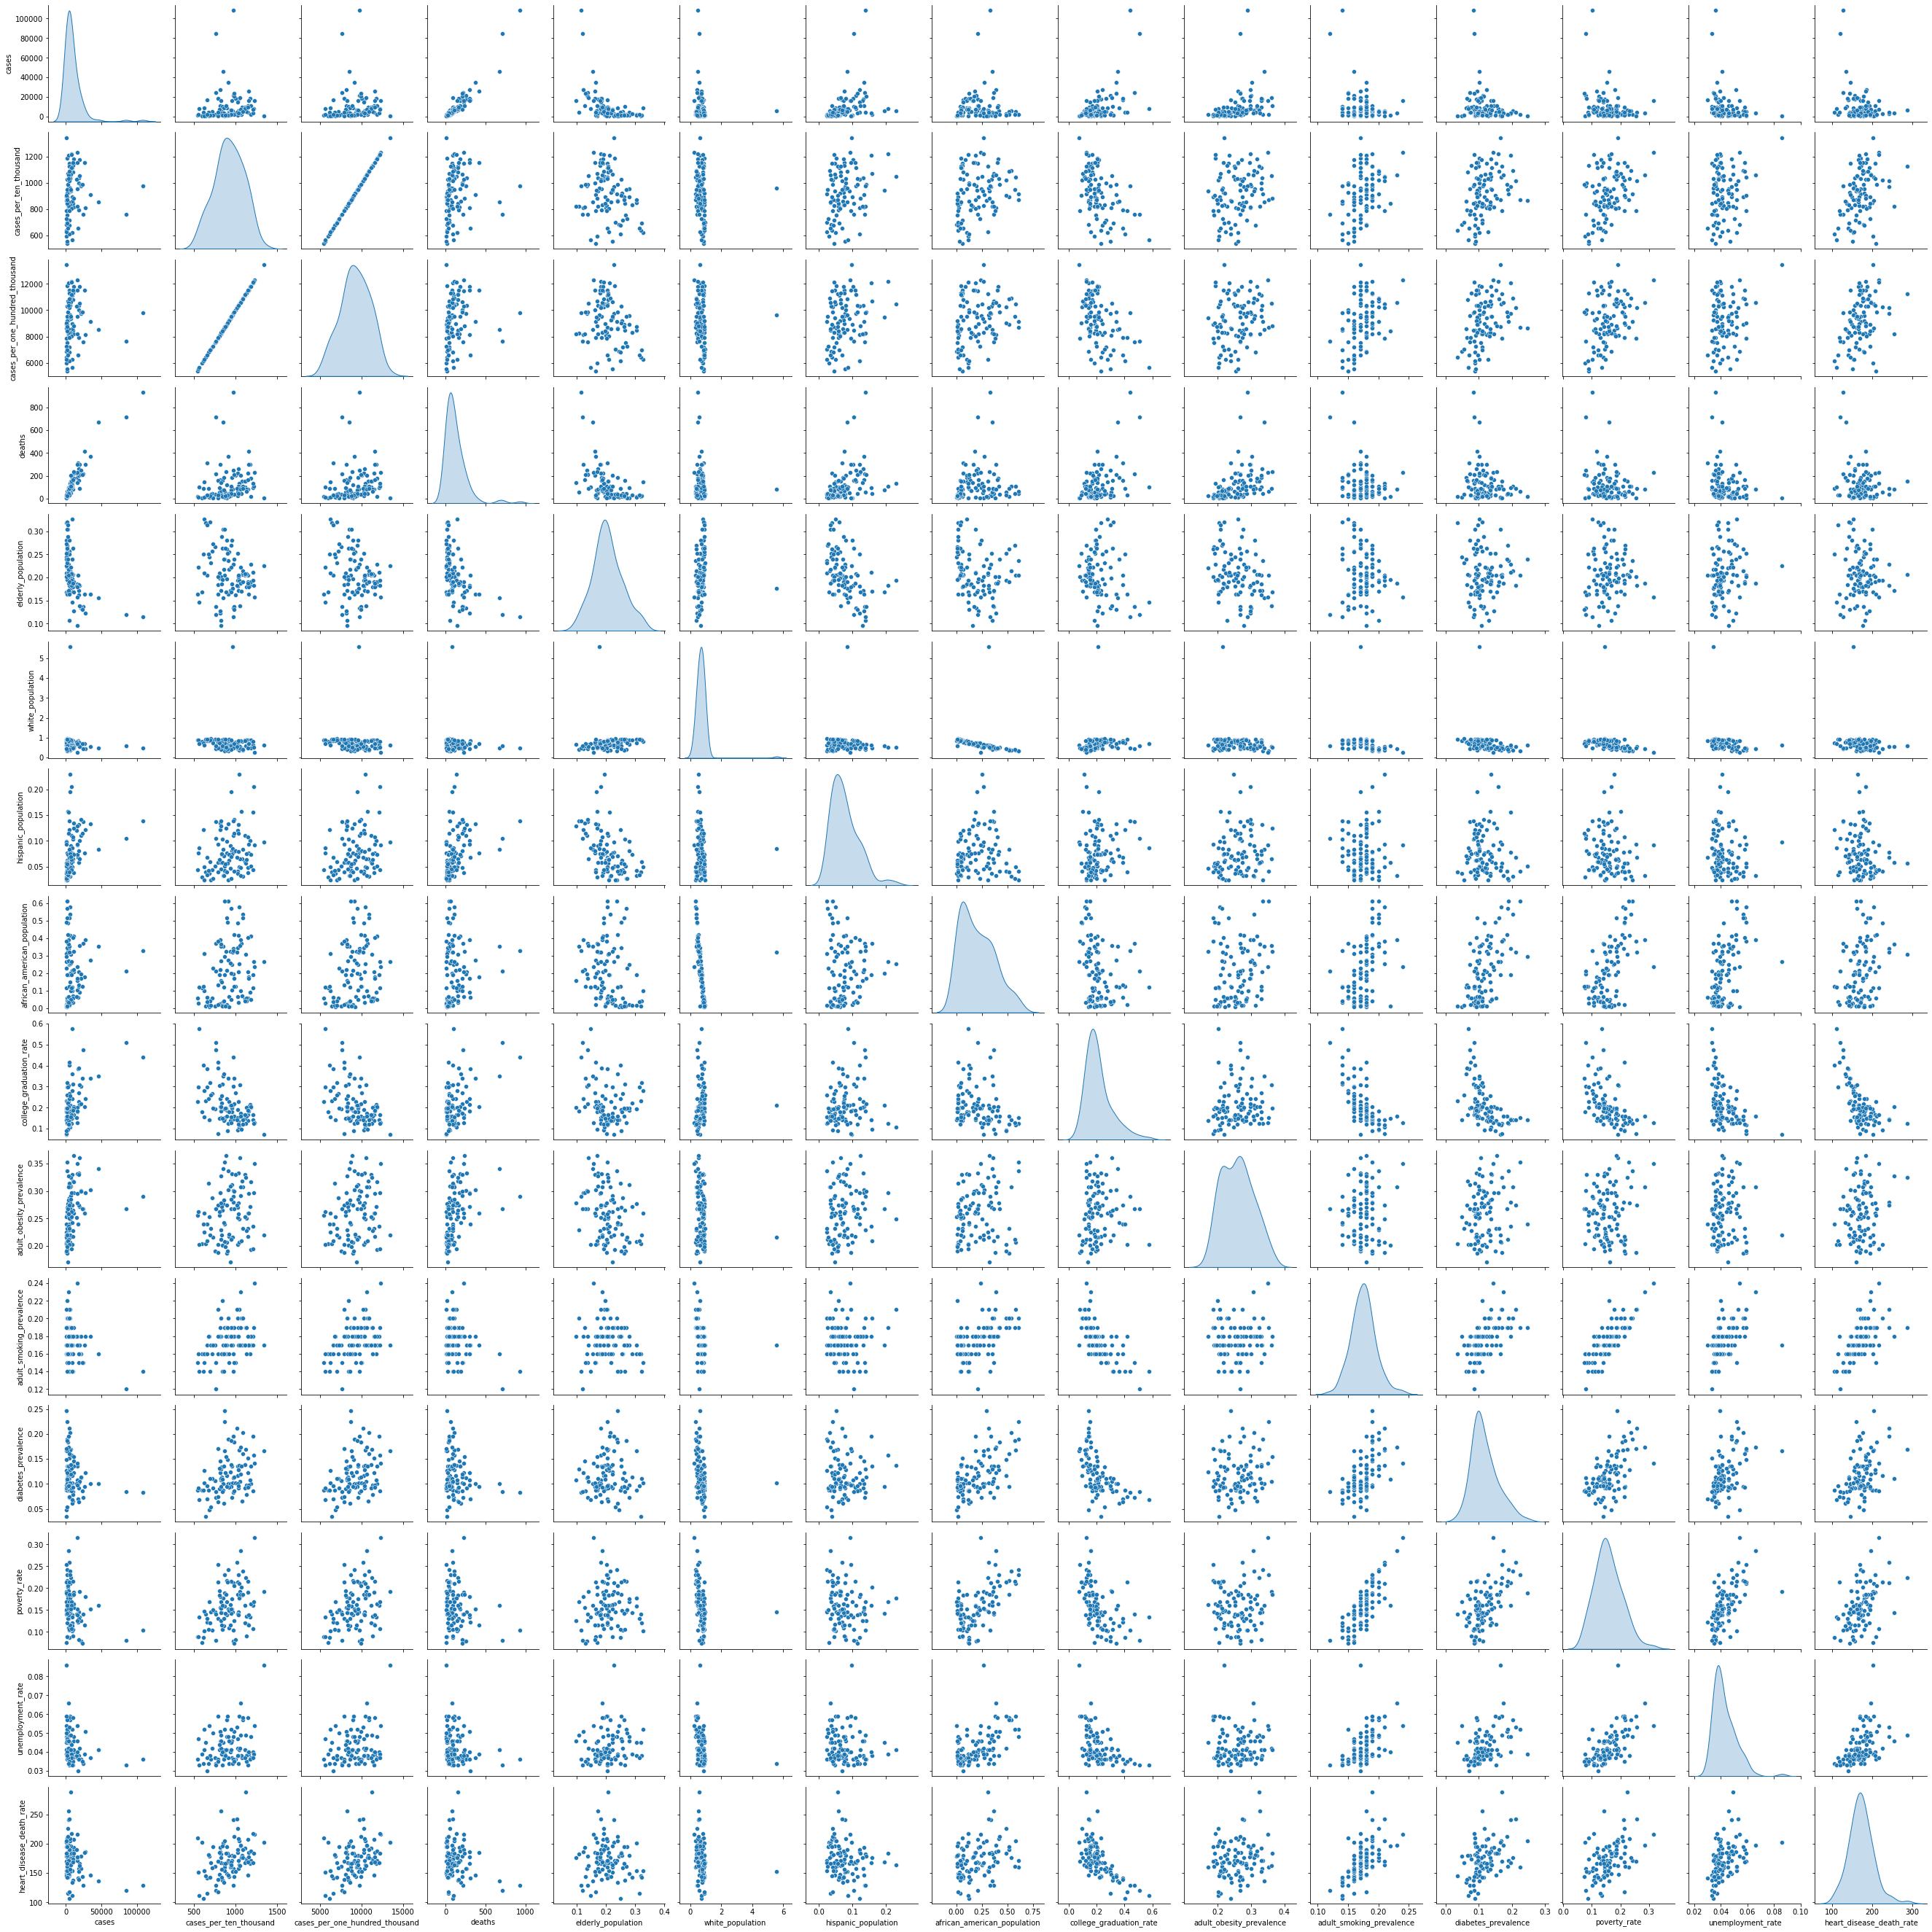

In [6]:
# Pairplot
sns.pairplot(data=df, diag_kind='kde')

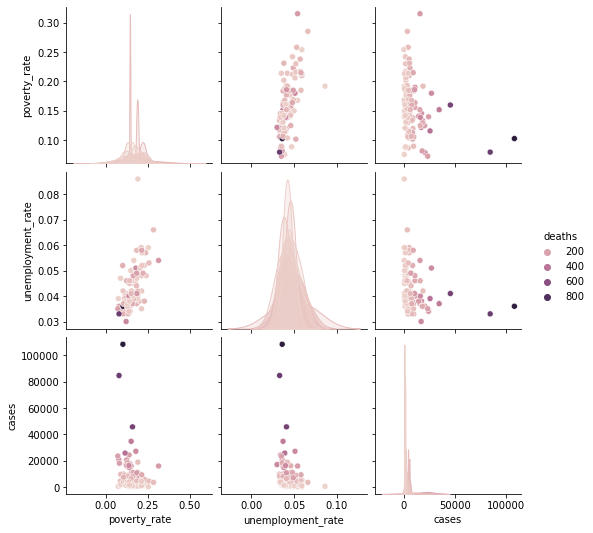

In [7]:
sns.pairplot(data=df[['county','poverty_rate','unemployment_rate','cases','deaths']], diag_kind='kde', hue='deaths')

<AxesSubplot:>

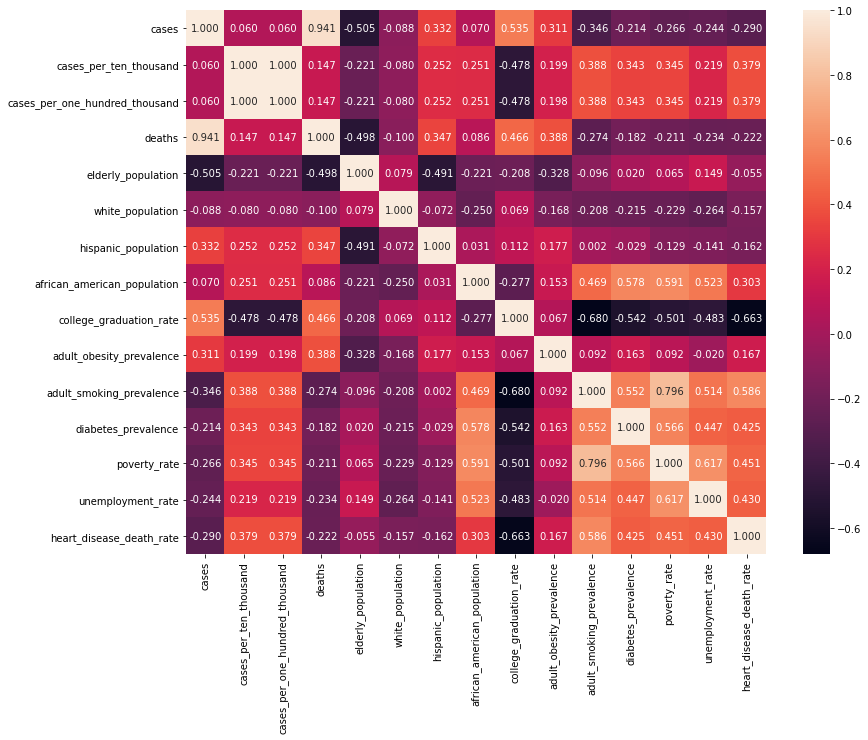

In [8]:
cor = df.corr()
plt.figure(figsize=(13,10))
sns.heatmap(cor, annot=True, fmt='.3f')

## 3. Ordinary Least Squares (OLS) Regression - Simple Linear Regression

In [9]:
# Describe deaths and cases
df[['deaths', 'cases']].describe()

,deaths,cases
count,100.000000,100.000000
mean,125.230000,9569.310000
std,146.323349,14947.673177
min,5.000000,316.000000
25%,36.000000,2113.250000
50%,85.500000,5077.000000
75%,163.250000,10150.750000
max,934.000000,108485.000000


In [10]:
# Info for deaths and cases
df[['deaths', 'cases']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   deaths  100 non-null    int64
 1   cases   100 non-null    int64
dtypes: int64(2)
memory usage: 1.6 KB


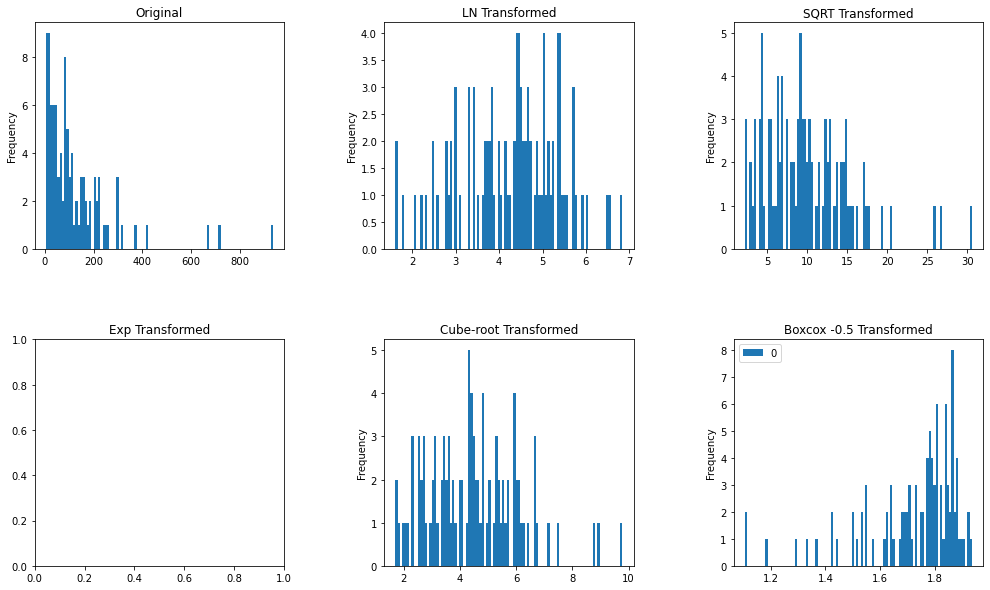


Distributions (normal test) sorted by goodness of fit:
----------------------------------------
              Distribution  Statistic       p_value
0                 Original  89.781202  3.193447e-20
1           LN Transformed   2.020141  3.641933e-01
2         SQRT Transformed  27.215842  1.230708e-06
3          Exp Transformed        NaN           NaN
4    Cube-root Transformed   8.759796  1.252664e-02
5  Boxcox -0.5 Transformed  38.874318  3.618672e-09
*If p<0.05, reject null (not of the distribution)


In [11]:
# Distribution plot
v = df.deaths
bins = 100
dist.norm_plot_and_test(v, bins)

<AxesSubplot:xlabel='deaths', ylabel='cases'>

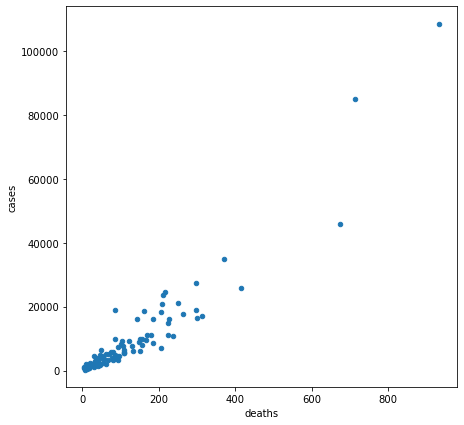

In [12]:
# Visual inspection. Does it look linear?
df.plot.scatter(x='deaths', y='cases', figsize=(7,7))

### Use regressionUtils

### 3.A. Death by Cases

                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     756.8
Date:                Tue, 27 Apr 2021   Prob (F-statistic):           6.91e-48
Time:                        17:59:07   Log-Likelihood:                -531.68
No. Observations:                 100   AIC:                             1067.
Df Residuals:                      98   BIC:                             1073.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.0887      5.921      6.264      0.0

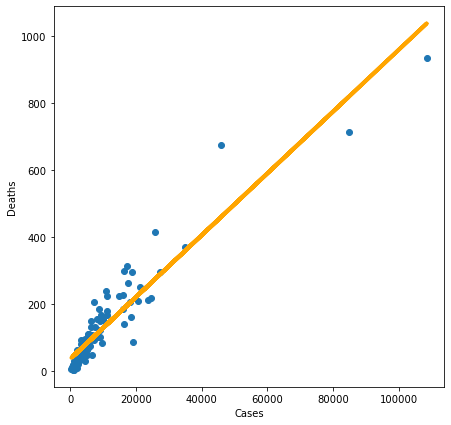

In [13]:
# Run the regression using model_deaths_by_cases = reg.OLS(y, X)
df2 = df.copy()
df2 = df2[(df.cases > 0) & (df.deaths > 0)]
X = df2[['cases']]
y = df2[['deaths']]
model_deaths_by_cases = reg.OLS(y, X)

# Plot the summary using reg.summary(model_deaths_by_cases) (use reg.summary(model_deaths_by_cases, True) to pretty-print the table)
reg.summary(model_deaths_by_cases)

# Plot the fit plot using reg.fitplot(model_deaths_by_cases, y, 'Deaths', X, 'Cases')
reg.fitplot(model_deaths_by_cases, y, 'Deaths', X, 'Cases')

### 3.B. Cases by Unemployment Rate

                            OLS Regression Results                            
Dep. Variable:                  cases   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     6.181
Date:                Tue, 27 Apr 2021   Prob (F-statistic):             0.0146
Time:                        17:59:07   Log-Likelihood:                -1099.6
No. Observations:                 100   AIC:                             2203.
Df Residuals:                      98   BIC:                             2208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.755e+04   7379.39

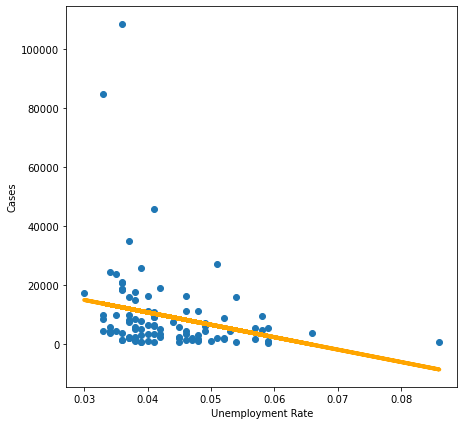

In [14]:
df2 = df.copy()
df2 = df2[(df.unemployment_rate > 0) & (df.cases > 0)]
X = df2[['unemployment_rate']]
y = df2[['cases']]
model_cases_deaths_by_unemployment_rate = reg.OLS(y, X)

# Print the summary and fitplot
reg.summary(model_cases_deaths_by_unemployment_rate)
reg.fitplot(model_cases_deaths_by_unemployment_rate, y, 'Cases', X, 'Unemployment Rate')

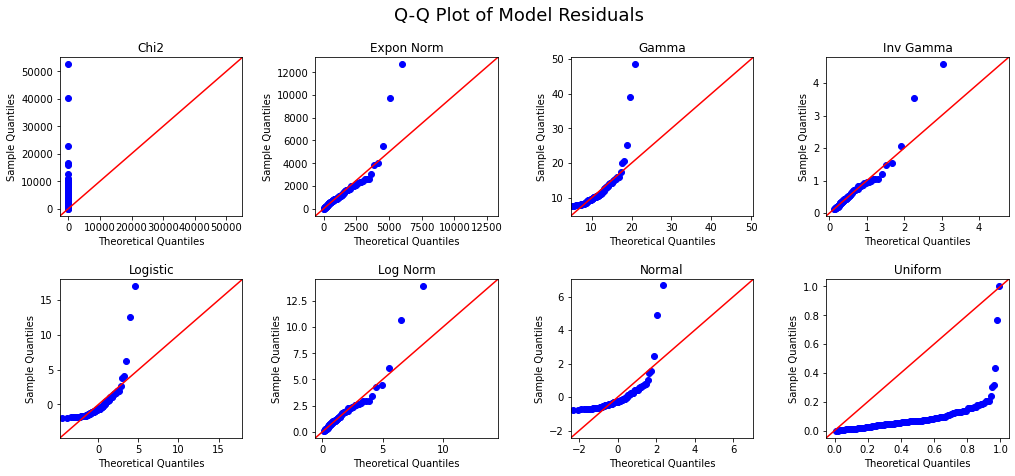

In [15]:
# Quantile-quantile (Q-Q) plot
reg.qqplot(model_cases_deaths_by_unemployment_rate.resid, 'Q-Q Plot of Model Residuals')

### 3.C. Deaths by Poverty Rate

                            OLS Regression Results                            
Dep. Variable:                 deaths   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     4.588
Date:                Tue, 27 Apr 2021   Prob (F-statistic):             0.0347
Time:                        17:59:09   Log-Likelihood:                -637.69
No. Observations:                 100   AIC:                             1279.
Df Residuals:                      98   BIC:                             1285.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          228.1326     50.143      4.550   

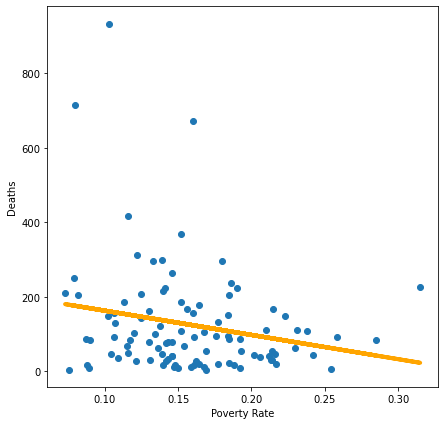

In [16]:
# Create model_deaths_by_poverty_rate
df2 = df.copy()
df2 = df2[(df.poverty_rate > 0) & (df.deaths > 0)]
X = df2[['poverty_rate']]
y = df2[['deaths']]
model_deaths_by_poverty_rate = reg.OLS(y, X)

# Print the summary and fitplot
reg.summary(model_deaths_by_poverty_rate)
reg.fitplot(model_deaths_by_poverty_rate, y, 'Deaths', X, 'Poverty Rate')

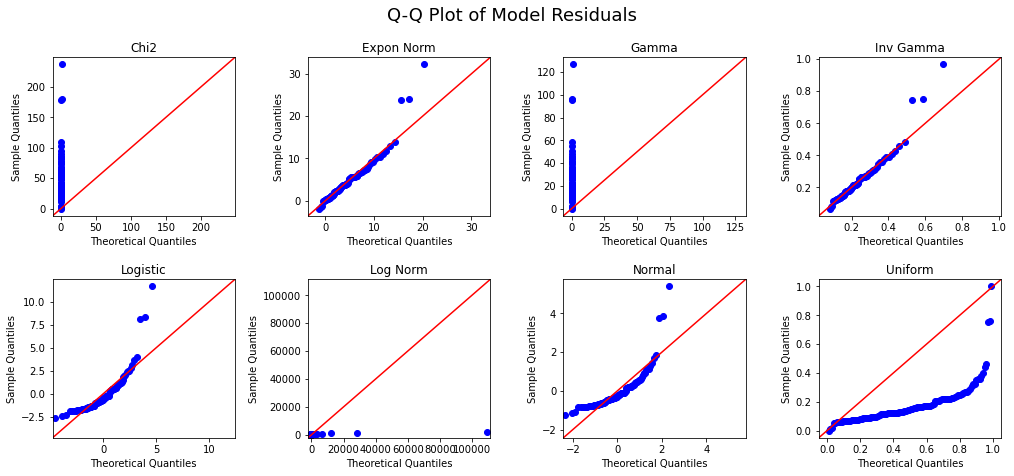

In [17]:
# Quantile-quantile (Q-Q) plot
reg.qqplot(model_deaths_by_poverty_rate.resid, 'Q-Q Plot of Model Residuals')

Text(0.5, 1.0, 'Spearman (Non-parametric)')

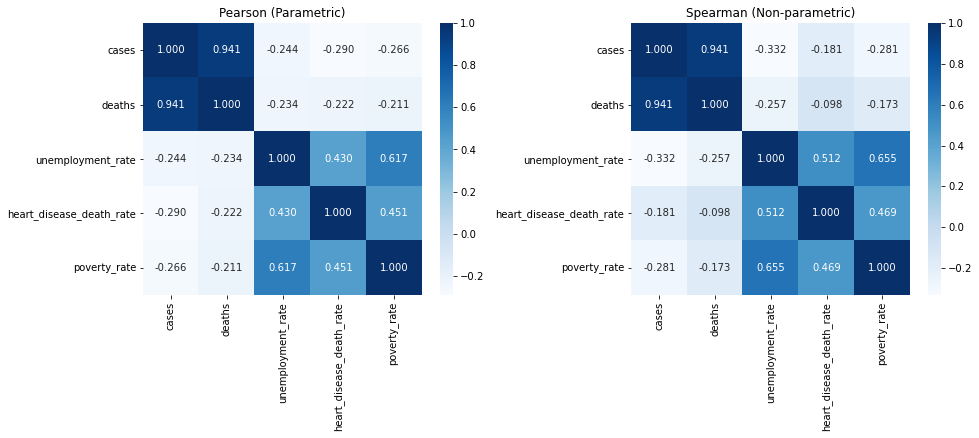

In [18]:
df2 = df[['cases', 'deaths', 'unemployment_rate', 'heart_disease_death_rate', 'poverty_rate']]
fig, axs = plt.subplots(1,2, figsize=(15, 5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
sns.heatmap(df2.corr(method='pearson'), annot=True, cmap='Blues', fmt='.3f', ax=axs[0])
sns.heatmap(df2.corr(method='spearman'), annot=True, cmap='Blues', fmt='.3f', ax=axs[1])
axs[0].set_title('Pearson (Parametric)')
axs[1].set_title('Spearman (Non-parametric)')

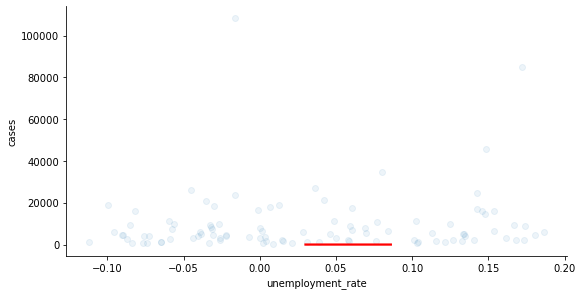

In [19]:
# Create an lmplot for unemployment_rate and cases
sns.lmplot(x='unemployment_rate', y='cases', data=df, y_jitter=0.01, x_jitter=0.15, 
           logistic=True, scatter_kws={'alpha':0.08}, line_kws={'color':'red'}, height=4, aspect=2)

## 4. Decision Trees

In [20]:
df2 = df.copy()
dummy = pd.get_dummies(df2['county'])
df2 = pd.concat([df2, dummy], axis=1)
df2 = df2.drop(['county'], axis=1)
df2.head()

,cases,cases_per_ten_thousand,cases_per_one_hundred_thousand,deaths,elderly_population,white_population,hispanic_population,african_american_population,college_graduation_rate,adult_obesity_prevalence,...,Vance,Wake,Warren,Washington,Watauga,Wayne,Wilkes,Wilson,Yadkin,Yancey
0,17580,1037,10371,263,0.171,0.629,0.131,0.209,0.229,0.333,...,0,0,0,0,0,0,0,0,0,0
1,4309,1149,11492,83,0.204,0.867,0.048,0.059,0.139,0.232,...,0,0,0,0,0,0,0,0,0,0
2,995,893,8934,5,0.280,0.867,0.099,0.018,0.187,0.206,...,0,0,0,0,0,0,0,0,0,0
3,2501,1023,10231,55,0.193,0.443,0.041,0.485,0.092,0.203,...,0,0,0,0,0,0,0,0,0,0
4,2048,753,7529,41,0.266,0.923,0.051,0.010,0.195,0.190,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X= df2.drop(['deaths'], axis=1)
y= df2['deaths']


# Perform train-test split of 0.3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


Accuracy Scores
------------------------------------------------------
Training: 100.00%
Testing:  0.00%

Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           5       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          13       0.00      0.00      0.00       0.0
          16       0.00      0.00      0.00       2.0
          18       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       2.0
          28       0.00      0.00      0.00       0.0
          31       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       1.0
          37       0.00      0.00      0.00       1.0
          39       0.00      0.00      0.00       1.0
          41       0.00      0.00      0.00       2.0
          43       0.00      0.00      0.00       0.0
     

ValueError: The number of FixedLocator locations (40), usually from a call to set_ticks, does not match the number of ticklabels (62).

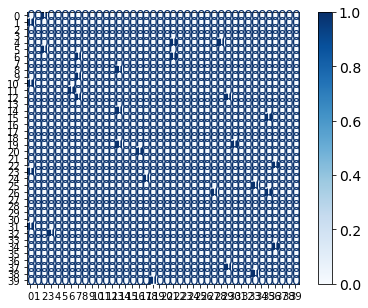

In [24]:
# Decision tree - unscaled
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier().fit(X_train, y_train)

# Call print report function
mlu.printReport(dt, X_train, X_test, y_train, y_test)

# Plot decision tree: https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py
from sklearn import tree 
plt.figure(figsize=(45,20))
tree.plot_tree(dt)